# import lib

In [1]:
%run EDA_common_utils.ipynb

In [2]:
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import traceback

In [3]:
from sklearn.linear_model import LinearRegression, PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data

In [4]:
df_unit = pd.read_csv('after-preprocess-data.csv')
df_unit

index  DEPARTURES_PERFORMED  PASSENGERS     FREIGHT      MAIL  \
0          6                   1.0   69.000000    0.000000  0.000000   
1          7                   1.0   66.000000    0.000000  0.000000   
2          8                   1.0   43.000000    0.000000  0.000000   
3          9                   1.0  127.000000    0.000000  0.000000   
4         10                   1.0  133.000000    0.000000  0.000000   
...      ...                   ...         ...         ...       ...   
12137  12365                 218.0   44.830275    0.000000  0.000000   
12138  12366                 220.0   52.450000   71.486364  0.000000   
12139  12367                 221.0   54.660633  105.031674  2.628959   
12140  12368                 233.0   42.871245    0.000000  0.000000   
12141  12369                 235.0   39.931915    0.000000  0.000000   

          DISTANCE    AIR_TIME UNIQUE_CARRIER  AIRCRAFT_TYPE  AIRCRAFT_CONFIG  \
0      1142.000000  151.000000         CP (2)            677                1   
1      1142.000000  156.000000         CP (2)            677                1   
2       399.000000   56.000000         CP (2)            673                1   
3       735.000000   98.000000             AA            699                1   
4       735.000000  100.000000             AA            699                1   
...            ...         ...            ...            ...              ...   
12137     1.830275   61.912844             OO            673                1   
12138     1.813636   79.050000             QX            482                1   
12139     1.805430   70.303167             QX            482                1   
12140     1.712446   59.510730             OO            673                1   
12141     1.697872   70.991489             OO            673                1   

       ...  GROUND_TIME  DIRECTION    STATE_NM   AIRPORT_SIZE  \
0      ...    23.000000     DEPART   Minnesota  large_airport   
1      ...    15.000000     ARRIVE   Minnesota  large_airport   
2      ...    16.000000     ARRIVE  Washington  large_airport   
3      ...    15.000000     DEPART     Arizona  large_airport   
4      ...    24.000000     ARRIVE     Arizona  large_airport   
...    ...          ...        ...         ...            ...   
12137  ...    20.252294     ARRIVE  Washington  large_airport   
12138  ...    17.340909     DEPART  Washington  large_airport   
12139  ...    15.882353     ARRIVE  Washington  large_airport   
12140  ...    22.695279     ARRIVE  Washington  large_airport   
12141  ...    25.936170     DEPART  Washington  large_airport   

                                            AIRPORT_NAME AIRPORT_CODE  \
0      Minneapolis–Saint Paul International Airport /...          MSP   
1      Minneapolis–Saint Paul International Airport /...          MSP   
2                   Seattle Tacoma International Airport          SEA   
3               Phoenix Sky Harbor International Airport          PHX   
4               Phoenix Sky Harbor International Airport          PHX   
...                                                  ...          ...   
12137               Seattle Tacoma International Airport          SEA   
12138               Seattle Tacoma International Airport          SEA   
12139               Seattle Tacoma International Airport          SEA   
12140               Seattle Tacoma International Airport          SEA   
12141               Seattle Tacoma International Airport          SEA   

          UNIQUE_CARRIER_NAME AIRCRAFT_CONFIG_NAME  \
0            Compass Airlines            Passenger   
1            Compass Airlines            Passenger   
2            Compass Airlines            Passenger   
3      American Airlines Inc.            Passenger   
4      American Airlines Inc.            Passenger   
...                       ...                  ...   
12137   SkyWest Airlines Inc.            Passenger   
12138             Horizon Air            Passenger   
12139             Horizon

In [5]:
df_unit.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG', 'YEAR', 'MONTH', 'SERVICE_CLASS', 'GROUND_TIME',
       'DIRECTION', 'STATE_NM', 'AIRPORT_SIZE', 'AIRPORT_NAME', 'AIRPORT_CODE',
       'UNIQUE_CARRIER_NAME', 'AIRCRAFT_CONFIG_NAME', 'SERVICE_CLASS_NAME',
       'SCHEDULED'],
      dtype='object')

In [6]:
data_overview(df_unit)

total   pdtype  unique_count %-uniques  null_count  \
index                 12142    int64         12142    100.0%           0   
DEPARTURES_PERFORMED  12142  float64           229     1.89%           0   
PASSENGERS            12142  float64          6217     51.2%           0   
FREIGHT               12142  float64          5372    44.24%           0   
MAIL                  12142  float64           605     4.98%           0   
DISTANCE              12142  float64          1782    14.68%           0   
AIR_TIME              12142  float64          6802    56.02%           0   
UNIQUE_CARRIER        12142   object            20     0.16%           0   
AIRCRAFT_TYPE         12142    int64            35     0.29%           0   
AIRCRAFT_CONFIG       12142    int64             2     0.02%           0   
YEAR                  12142    int64             6     0.05%           0   
MONTH                 12142    int64            12      0.1%           0   
SERVICE_CLASS         12142   object             3     0.02%           0   
GROUND_TIME           12142  float64          4876    40.16%           0   
DIRECTION             12142   object             2     0.02%           0   
STATE_NM              12142   object            46     0.38%           0   
AIRPORT_SIZE          12142   object             3     0.02%           0   
AIRPORT_NAME          12142   object           170      1.4%           0   
AIRPORT_CODE          12142   object           170      1.4%           0   
UNIQUE_CARRIER_NAME   12142   object            20     0.16%           0   
AIRCRAFT_CONFIG_NAME  12142   object             2     0.02%           0   
SERVICE_CLASS_NAME    12142   object             3     0.02%           0   
SCHEDULED             12142    int64             2     0.02%           0   

                     %-null  blank_count %-blanks  zero_count %-zeros  
index                  0.0%            0     0.0%           0    0.0%  
DEPARTURES_PERFORMED   0.0%            0     0.0%           0    0.0%  
PASSENGERS             0.0%            0     0.0%        2231  18.37%  
FREIGHT                0.0%            0     0.0%        6007  49.47%  
MAIL                   0.0%            0     0.0%       11496  94.68%  
DISTANCE               0.0%            0     0.0%           0    0.0%  
AIR_TIME               0.0%            0     0.0%           0    0.0%  
UNIQUE_CARRIER         0.0%            0     0.0%           0    0.0%  
AIRCRAFT_TYPE          0.0%            0     0.0%           0    0.0%  
AIRCRAFT_CONFIG        0.0%            0     0.0%           0    0.0%  
YEAR                   0.0%            0     0.0%           0    0.0%  
MONTH                  0.0%            0     0.0%           0    0.0%  
SERVICE_CLASS          0.0%            0     0.0%           0    0.0%  
GROUND_TIME            0.0%            0     0.0%           0    0.0%  
DIRECTION              0.0%            0     0.0%           0    0.0%  
STATE_NM               0.0%            0     0.0%           0    0.0%  
AIRPORT_SIZE           0.0%            0     0.0%           0    0.0%  
AIRPORT_NAME           0.0%            0     0.0%           0    0.0%  
AIRPORT_CODE           0.0%            0     0.0%           0    0.0%  
UNIQUE_CARRIER_NAME    0.0%            0     0.0%           0    0.0%  
AIRCRAFT_CONFIG_NAME   0.0%            0     0.0%           0    0.0%  
SERVICE_CLASS_NAME     0.0%            0     0.0%           0    0.0%  
SCHEDULED              0.0%            0     0.0%         283   2.33%

<div style="background-color:#87b87b;
            padding:15px">
- keep all numerical columns <br>
- Opt out time columns from model <br>
- UNIQUE_CARRIER: transform it to one-hot vector <br>
- AIRCRAFT_TYPE has correlation with ground_time, then keep it <br>
- AIRCRAFT_CONFIG: encode 1 if it is passenger else 0 <br>
- SERVICE_CLASS: Opt out since it already represented by other column <br>
- DIRECTION: encode 1 if it is depart 0 otherwise <br>
- AIRPORT_SIZE: since there is a small number of small airport, then encode it to 1 if it is large airport 0 otherwise <br>
- AIRPORT_CODE: encode one-hot vector for top 20 airports <br>
</div>
    

# preprocess model

In [7]:
df_unit.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG', 'YEAR', 'MONTH', 'SERVICE_CLASS', 'GROUND_TIME',
       'DIRECTION', 'STATE_NM', 'AIRPORT_SIZE', 'AIRPORT_NAME', 'AIRPORT_CODE',
       'UNIQUE_CARRIER_NAME', 'AIRCRAFT_CONFIG_NAME', 'SERVICE_CLASS_NAME',
       'SCHEDULED'],
      dtype='object')

In [8]:
numerical_columns = [
    'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'AIR_TIME', 'AIRCRAFT_TYPE'
]
label = 'GROUND_TIME'

In [9]:
df = df_unit.copy()

## UNIQUE_CARRIER

In [10]:
df['UNIQUE_CARRIER'].value_counts()[:15]

OO        3019
WN        1982
QX        1235
DL         873
FX         866
5X         861
UA         625
G4         578
AS         489
AA         467
22Q        343
SY         162
MQ         152
YV         139
CP (2)     108
Name: UNIQUE_CARRIER, dtype: int64

In [11]:
df['UNIQUE_CARRIER'].value_counts()

OO        3019
WN        1982
QX        1235
DL         873
FX         866
5X         861
UA         625
G4         578
AS         489
AA         467
22Q        343
SY         162
MQ         152
YV         139
CP (2)     108
F9          80
09Q         62
YX          60
G7          29
B6          12
Name: UNIQUE_CARRIER, dtype: int64

## AIRCRAFT_CONFIG

In [12]:
df.loc[df['AIRCRAFT_CONFIG'] != 1, 'AIRCRAFT_CONFIG'] = 0

In [13]:
df['AIRCRAFT_CONFIG'].value_counts()

1    10415
0     1727
Name: AIRCRAFT_CONFIG, dtype: int64

In [14]:
df = df.rename({'AIRCRAFT_CONFIG': 'AIRCRAFT_CONFIG_PASSENGER'}, axis=1)
df = df.drop(columns = ['AIRCRAFT_CONFIG_NAME'])

## DIRECTION

In [15]:
df['DIRECTION'].value_counts()

DEPART    6160
ARRIVE    5982
Name: DIRECTION, dtype: int64

In [16]:
df['DIRECTION_DEPART'] = np.select([(df['DIRECTION'] == 'DEPART'), (df['DIRECTION'] == 'ARRIVE')], [1, 0])
df['DIRECTION_DEPART'].value_counts()

1    6160
0    5982
Name: DIRECTION_DEPART, dtype: int64

In [17]:
df = df.drop(columns = ['DIRECTION'])

## AIRPORT_SIZE

In [18]:
df['AIRPORT_SIZE'].value_counts()

large_airport     9895
medium_airport    2221
small_airport       26
Name: AIRPORT_SIZE, dtype: int64

In [19]:
df['LARGE_AIRPORT'] = np.select([(df['AIRPORT_SIZE'] == 'large_airport'), (df['AIRPORT_SIZE'] != 'large_airport')], [1, 0])
df['LARGE_AIRPORT'].value_counts()

1    9895
0    2247
Name: LARGE_AIRPORT, dtype: int64

In [20]:
df = df.drop(columns = ['AIRPORT_SIZE'])

## AIRPORT_CODE

In [21]:
df.loc[~df['AIRPORT_CODE'].isin(list(df['AIRPORT_CODE'].value_counts()[:20].index)), 'AIRPORT_CODE'] = 'Others'

In [22]:
df.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG_PASSENGER', 'YEAR', 'MONTH', 'SERVICE_CLASS',
       'GROUND_TIME', 'STATE_NM', 'AIRPORT_NAME', 'AIRPORT_CODE',
       'UNIQUE_CARRIER_NAME', 'SERVICE_CLASS_NAME', 'SCHEDULED',
       'DIRECTION_DEPART', 'LARGE_AIRPORT'],
      dtype='object')

## STATE_NM

In [23]:
df_unit['STATE_NM'].value_counts()[:20]

California    2693
Washington    1457
Colorado      1352
Utah          1217
Arizona        778
Nevada         722
Texas          554
Oregon         515
Idaho          483
Minnesota      458
Illinois       454
Tennessee      311
Kentucky       244
Montana        189
Wyoming        184
Iowa            87
Oklahoma        83
Missouri        83
Georgia         51
Wisconsin       24
Name: STATE_NM, dtype: int64

In [24]:
df.loc[~df['STATE_NM'].isin(list(df['STATE_NM'].value_counts()[:20].index)), 'STATE_NM'] = 'Others'

## Transform cate to count value

In [25]:
def transform_object_cate_to_value_counts(df, col):
    values = df[col].value_counts().values
    condition_values = df[col].value_counts().index
    conditions = [df[col] == condition  for condition in condition_values]
    df[col] = np.select(conditions, values)
    
    return df

In [26]:
df = transform_object_cate_to_value_counts(df, 'UNIQUE_CARRIER')
df = transform_object_cate_to_value_counts(df, 'AIRPORT_CODE')
df = transform_object_cate_to_value_counts(df, 'STATE_NM')

## drop SERVICE_CLASS, AIRPORT_NAME, SERVICE_CLASS_NAME, AIRPORT_NAME, UNIQUE_CARRIER_NAME

In [27]:
optout = ['SERVICE_CLASS', 'AIRPORT_NAME', 'SERVICE_CLASS_NAME', 'AIRPORT_NAME', 'UNIQUE_CARRIER_NAME']

In [28]:
df = df.drop(columns=optout)

## Get dummies: UNIQUE_CARRIER, AIRPORT_CODE

In [29]:
df_dummies = pd.get_dummies(df, columns=['UNIQUE_CARRIER'], drop_first=True)

In [30]:
df_dummies = pd.get_dummies(df_dummies, columns=['AIRPORT_CODE'], drop_first=True)

In [31]:
df_dummies = pd.get_dummies(df_dummies, columns=['STATE_NM'], drop_first=True)

In [32]:
# df_dummies.columns

In [33]:
df_dummies_train = df_dummies[df_dummies.YEAR < 2021]
df_dummies_test = df_dummies[df_dummies.YEAR == 2021]

# Split train and validate

<div style="background-color:#87b87b;
            padding:15px">
- All data before 2021 is train data and data in 2021 is validation data<br>
</div>
    

In [34]:
df_train = df[df.YEAR < 2021]
df_test = df[df.YEAR == 2021]

In [35]:
# df_train.to_csv('df_train.csv', index=None)
# df_test.to_csv('df_test.csv', index=None)

In [37]:
df_train.shape

(9686, 18)

In [38]:
df_test.shape

(2456, 18)

# GLM

<div style="background-color:#87b87b;
            padding:15px">
- Since the distribution of ground_time is like poisson and its log is like normal distribution, then I will use Poisson to GLM <br>
</div>
    

## Train on GLM Poisson

In [39]:
def plot_model_fit(y, y_pred, desc="Model Fit Plot on training data"):
    fig, ax = plt.subplots()
    ax.scatter(y_pred, y)
    line_fit = sm.OLS(y_train, sm.add_constant(y_train_pred, prepend=True)).fit()
    abline_plot(model_results=line_fit, ax=ax)


    ax.set_title(desc)
    ax.set_ylabel('Actual Ground Time')
    ax.set_xlabel('Fitted Ground Time')

In [40]:
def rmse(y, y_hat):
    residuals = y - y_hat

    # Square the residuals
    squared_residuals = residuals ** 2

    # Calculate the mean of the squared residuals
    mean_squared_residuals = np.mean(squared_residuals)

    # Take the square root of the mean
    rmse = np.sqrt(mean_squared_residuals)
    
    return rmse

### dummies

In [41]:
X_dummies_columns = [col for col in df_dummies.columns if col not in [label, 'YEAR', 'index', 'DEPARTURES_PERFORMED']]
X_dummies_train = df_dummies_train[X_dummies_columns]
X_dummies_test = df_dummies_test[X_dummies_columns]

In [42]:
y_train = df_train[label]
y_test = df_test[label]

In [43]:
model = sm.GLM(y_train, sm.add_constant(X_dummies_train), family=sm.families.Poisson(link=sm.families.links.log()), 
               freq_weights=df_dummies_train['DEPARTURES_PERFORMED'])
glm_model = model.fit()

# Print the summary
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242619
Model Family:                 Poisson   Df Model:                           65
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4875e+05
Date:                Fri, 12 May 2023   Deviance:                   1.2705e+05
Time:                        18:01:47   Pearson chi2:                 1.45e+05
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [44]:
y_train_pred = glm_model.predict(sm.add_constant(X_dummies_train))
y_test_pred = glm_model.predict(sm.add_constant(X_dummies_test))

In [45]:
print("Root Mean Squared Error (RMSE) of training:", rmse(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) of testing:", rmse(y_test, y_test_pred))

Root Mean Squared Error (RMSE) of training: 7.738663034437294
Root Mean Squared Error (RMSE) of testing: 6.762282743465413


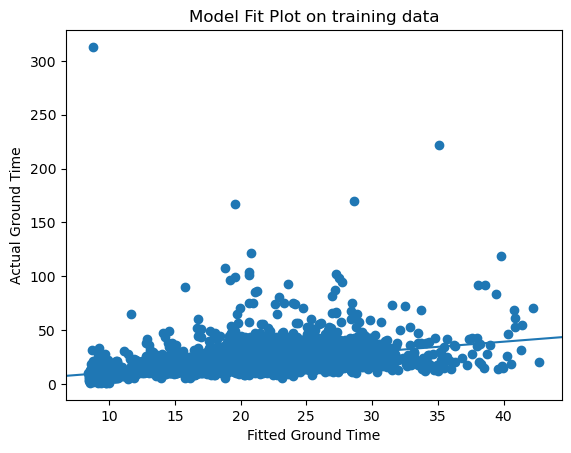

In [46]:
plot_model_fit(y_train, y_train_pred)
plot_model_fit(y_test, y_test_pred, desc="Model Fit Plot on testing data")

### no dummies - transform count

In [47]:
df_train.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG_PASSENGER', 'YEAR', 'MONTH', 'GROUND_TIME', 'STATE_NM',
       'AIRPORT_CODE', 'SCHEDULED', 'DIRECTION_DEPART', 'LARGE_AIRPORT'],
      dtype='object')

In [48]:
categorical_columns = ['UNIQUE_CARRIER', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG_PASSENGER', 'MONTH', 'STATE_NM', 'AIRPORT_CODE']

df_train['AIRTIME_DISTANCE'] = df_train['AIR_TIME'] *  df_train['DISTANCE']
df_test['AIRTIME_DISTANCE'] = df_test['AIR_TIME'] *  df_test['DISTANCE']

# Combine the train and test data to get all possible levels for each categorical variable
combined_data = pd.concat([df_train, df_test], axis=0)

# Set the categories for each categorical variable in both X_train and X_test
for col in categorical_columns:
    categories = combined_data[col].unique()
    df_train[col] = pd.Categorical(df_train[col], categories=categories)
    df_test[col] = pd.Categorical(df_test[col], categories=categories)

In [49]:
X_columns = [col for col in df.columns if col not in [label, 'YEAR', 'index']]
X_train = df_train[X_columns]
X_test = df_test[X_columns]

In [57]:
formula = 'GROUND_TIME ~ PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(UNIQUE_CARRIER) + ' + \
            'C(AIRCRAFT_TYPE) + C(AIRCRAFT_CONFIG_PASSENGER) + C(MONTH) + C(STATE_NM) + C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

In [50]:

model = smf.glm(formula=formula, data=df_train.copy(), family=sm.families.Poisson(link=sm.families.links.log()), 
               freq_weights=df_train['DEPARTURES_PERFORMED'])
glm_model = model.fit()

# Print the summary
print(glm_model.summary())

    
y_train_pred = glm_model.predict(df_train)
y_test_pred = glm_model.predict(df_test)
print("Root Mean Squared Error (RMSE) of training:", rmse(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) of testing:", rmse(y_test, y_test_pred))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242580
Model Family:                 Poisson   Df Model:                          104
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4025e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1004e+05
Time:                        18:02:26   Pearson chi2:                 1.23e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.603167048775513
Root Mean Squared Error (RMSE) of testing: 6.645467260289577


In [55]:
def glm_modeling(formula, df_train):
    model = smf.glm(formula=formula, data=df_train.copy(), family=sm.families.Poisson(link=sm.families.links.log()), 
                   freq_weights=df_train['DEPARTURES_PERFORMED'])
    glm_model = model.fit()

    # Print the summary
    print(glm_model.summary())


    y_train_pred = glm_model.predict(df_train)
    y_test_pred = glm_model.predict(df_test)
    print("Root Mean Squared Error (RMSE) of training:", rmse(y_train, y_train_pred))
    print("Root Mean Squared Error (RMSE) of testing:", rmse(y_test, y_test_pred))

### Missing UNIQUE_CARRIER

In [58]:
formula

'GROUND_TIME ~ PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(UNIQUE_CARRIER) + C(AIRCRAFT_TYPE) + C(AIRCRAFT_CONFIG_PASSENGER) + C(MONTH) + C(STATE_NM) + C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

In [59]:
formula_carrier = formula.replace('C(UNIQUE_CARRIER) +', '')

In [60]:
glm_modeling(formula_carrier, df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242596
Model Family:                 Poisson   Df Model:                           88
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4697e+05
Date:                Fri, 12 May 2023   Deviance:                   1.2348e+05
Time:                        18:14:23   Pearson chi2:                 1.37e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.752662959789074
Root Mean Squared Error (RMSE) of testing: 6.757982074869337


### Missing AIRCRAFT_TYPE

In [61]:
glm_modeling(formula.replace('C(AIRCRAFT_TYPE) +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242610
Model Family:                 Poisson   Df Model:                           74
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4276e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1506e+05
Time:                        18:15:01   Pearson chi2:                 1.31e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.662616351128452
Root Mean Squared Error (RMSE) of testing: 6.68146598637565


### Missing PASSENGERS

In [62]:
glm_modeling(formula.replace('PASSENGERS +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4222e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1398e+05
Time:                        18:15:39   Pearson chi2:                 1.26e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.60489741740862
Root Mean Squared Error (RMSE) of testing: 6.562746794827336


### Missing FREIGHT

In [63]:
glm_modeling(formula.replace('FREIGHT +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4025e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1004e+05
Time:                        18:15:58   Pearson chi2:                 1.23e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.603545073182671
Root Mean Squared Error (RMSE) of testing: 6.6452742355186025


In [64]:
formula

'GROUND_TIME ~ PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(UNIQUE_CARRIER) + C(AIRCRAFT_TYPE) + C(AIRCRAFT_CONFIG_PASSENGER) + C(MONTH) + C(STATE_NM) + C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

### Missing Mail

In [65]:
glm_modeling(formula.replace('MAIL +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4025e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1005e+05
Time:                        18:16:43   Pearson chi2:                 1.23e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.602503442398712
Root Mean Squared Error (RMSE) of testing: 6.643702190081499


### Missing distance

In [66]:
glm_modeling(formula.replace('DISTANCE +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4029e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1013e+05
Time:                        18:17:01   Pearson chi2:                 1.23e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.612709313821704
Root Mean Squared Error (RMSE) of testing: 6.651078760202193


In [67]:
formula

'GROUND_TIME ~ PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(UNIQUE_CARRIER) + C(AIRCRAFT_TYPE) + C(AIRCRAFT_CONFIG_PASSENGER) + C(MONTH) + C(STATE_NM) + C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

### Missing direction_depart

In [68]:
glm_modeling(formula.replace('DIRECTION_DEPART +', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4120e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1194e+05
Time:                        18:18:55   Pearson chi2:                 1.25e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.613875383706251
Root Mean Squared Error (RMSE) of testing: 6.689070496385435


### Missing large_airport

In [70]:
glm_modeling(formula.replace('+ LARGE_AIRPORT', ''), df_train.copy())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 9686
Model:                            GLM   Df Residuals:                   242581
Model Family:                 Poisson   Df Model:                          103
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4025e+05
Date:                Fri, 12 May 2023   Deviance:                   1.1005e+05
Time:                        18:19:51   Pearson chi2:                 1.23e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Root Mean Squared Error (RMSE) of training: 7.605642416561754
Root Mean Squared Error (RMSE) of testing: 6.652971769797646


## GLMM on Poisson

In [72]:
df_train.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'UNIQUE_CARRIER', 'AIRCRAFT_TYPE',
       'AIRCRAFT_CONFIG_PASSENGER', 'YEAR', 'MONTH', 'GROUND_TIME', 'STATE_NM',
       'AIRPORT_CODE', 'SCHEDULED', 'DIRECTION_DEPART', 'LARGE_AIRPORT',
       'AIRTIME_DISTANCE'],
      dtype='object')

In [73]:
df_dummies_train.columns

Index(['index', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL',
       'DISTANCE', 'AIR_TIME', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG_PASSENGER',
       'YEAR', 'MONTH', 'GROUND_TIME', 'SCHEDULED', 'DIRECTION_DEPART',
       'LARGE_AIRPORT', 'UNIQUE_CARRIER_29', 'UNIQUE_CARRIER_60',
       'UNIQUE_CARRIER_62', 'UNIQUE_CARRIER_80', 'UNIQUE_CARRIER_108',
       'UNIQUE_CARRIER_139', 'UNIQUE_CARRIER_152', 'UNIQUE_CARRIER_162',
       'UNIQUE_CARRIER_343', 'UNIQUE_CARRIER_467', 'UNIQUE_CARRIER_489',
       'UNIQUE_CARRIER_578', 'UNIQUE_CARRIER_625', 'UNIQUE_CARRIER_861',
       'UNIQUE_CARRIER_866', 'UNIQUE_CARRIER_873', 'UNIQUE_CARRIER_1235',
       'UNIQUE_CARRIER_1982', 'UNIQUE_CARRIER_3019', 'AIRPORT_CODE_240',
       'AIRPORT_CODE_246', 'AIRPORT_CODE_262', 'AIRPORT_CODE_285',
       'AIRPORT_CODE_343', 'AIRPORT_CODE_349', 'AIRPORT_CODE_392',
       'AIRPORT_CODE_396', 'AIRPORT_CODE_400', 'AIRPORT_CODE_433',
       'AIRPORT_CODE_449', 'AIRPORT_CODE_456', 'AIRPORT_CODE_516',
       

In [74]:
# Load your data as a Pandas DataFrame
data = df_train.copy()

# Fit a Poisson GLM for each UNIQUE_CARRIER
formula = 'GROUND_TIME ~ DEPARTURES_PERFORMED + PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(AIRCRAFT_TYPE) + AIRCRAFT_CONFIG_PASSENGER' + \
          '+ C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

grouped_data = data.groupby('UNIQUE_CARRIER')

# Create an empty dictionary to store the fitted models for each carrier
carrier_models = {}

for carrier, group_data in grouped_data:
    print(f"Model for carrier {carrier}:")
    
    try:
        glm = smf.glm(formula, data=group_data, family=sm.families.Poisson(sm.families.links.log()))
        glm_result = glm.fit()

        # Store the fitted model in the dictionary
        carrier_models[carrier] = glm_result
    except Exception as e:
        print(traceback.format_exc())
        continue
    
    # Print the summary of the model
    print(glm_result.summary())
    print("\n")

Model for carrier 108:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                  108
Model:                            GLM   Df Residuals:                       94
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -331.24
Date:                Fri, 12 May 2023   Deviance:                       118.48
Time:                        18:58:40   Pearson chi2:                     130.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4407
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                  685
Model:                            GLM   Df Residuals:                      652
Model Family:                 Poisson   Df Model:                           32
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2145.2
Date:                Fri, 12 May 2023   Deviance:                       948.58
Time:                        18:58:41   Pearson chi2:                 1.04e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1887
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 2531
Model:                            GLM   Df Residuals:                     2505
Model Family:                 Poisson   Df Model:                           25
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9269.4
Date:                Fri, 12 May 2023   Deviance:                       5842.8
Time:                        18:58:42   Pearson chi2:                 7.98e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3120
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                  641
Model:                            GLM   Df Residuals:                      620
Model Family:                 Poisson   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1814.1
Date:                Fri, 12 May 2023   Deviance:                       661.09
Time:                        18:58:43   Pearson chi2:                     915.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                 1596
Model:                            GLM   Df Residuals:                     1571
Model Family:                 Poisson   Df Model:                           24
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3984.3
Date:                Fri, 12 May 2023   Deviance:                       649.26
Time:                        18:58:45   Pearson chi2:                     700.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1441
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                   46
Model:                            GLM   Df Residuals:                       31
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -207.14
Date:                Fri, 12 May 2023   Deviance:                       194.23
Time:                        18:58:45   Pearson chi2:                     215.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.7160
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                  116
Model:                            GLM   Df Residuals:                      103
Model Family:                 Poisson   Df Model:                           12
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -348.28
Date:                Fri, 12 May 2023   Deviance:                       114.16
Time:                        18:58:46   Pearson chi2:                     123.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2810
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GROUND_TIME   No. Observations:                   56
Model:                            GLM   Df Residuals:                       45
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -181.11
Date:                Fri, 12 May 2023   Deviance:                       80.492
Time:                        18:58:46   Pearson chi2:                     84.5
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2086
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Traceback (most recent call last):
  File "C:\Users\maiph\AppData\Local\Temp\ipykernel_8152\4003591841.py", line 18, in <module>
    glm_result = glm.fit()
  File "C:\Users\maiph\miniconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py", line 1075, in fit
    return self._fit_irls(start_params=start_params, maxiter=maxiter,
  File "C:\Users\maiph\miniconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py", line 1224, in _fit_irls
    raise PerfectSeparationError(msg)
statsmodels.tools.sm_exceptions.PerfectSeparationError: Perfect separation detected, results not available



In [123]:
df_unit.groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
09Q         62
22Q        343
5X         861
AA         467
AS         489
B6          12
CP (2)     108
DL         873
F9          80
FX         866
G4         578
G7          29
MQ         152
OO        3019
QX        1235
SY         162
UA         625
WN        1982
YV         139
YX          60
dtype: int64

In [ ]:
df_unit.groupby('UNIQUE_CARRIER').size()

In [118]:
for carrier, group_data in data.groupby('UNIQUE_CARRIER'):
    print(carrier)
    print(group_data)

108
      GROUND_TIME  DEPARTURES_PERFORMED  PASSENGERS  FREIGHT  MAIL  \
0       23.000000                   1.0   69.000000      0.0   0.0   
1       15.000000                   1.0   66.000000      0.0   0.0   
2       16.000000                   1.0   43.000000      0.0   0.0   
18      15.000000                   1.0   59.000000      0.0   0.0   
134     14.000000                   1.0   23.000000      0.0   0.0   
...           ...                   ...         ...      ...   ...   
8878    20.000000                  11.0   67.636364      0.0   0.0   
9077    28.000000                  21.0   58.142857      0.0   0.0   
9078    21.523810                  21.0   70.047619      0.0   0.0   
9095    22.818182                  22.0   42.136364      0.0   0.0   
9096    19.727273                  22.0   54.000000      0.0   0.0   

         DISTANCE    AIR_TIME AIRCRAFT_TYPE AIRCRAFT_CONFIG_PASSENGER  \
0     1142.000000  151.000000           677                         1   
1     114

In [114]:
# data = df_train.copy()[['GROUND_TIME', 'DEPARTURES_PERFORMED', 'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'AIR_TIME', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG_PASSENGER',
#           'AIRPORT_CODE', 'SCHEDULED', 'DIRECTION_DEPART', 'LARGE_AIRPORT', 'UNIQUE_CARRIER']]

# # Fit a Poisson GLM for each UNIQUE_CARRIER
# formula = 'GROUND_TIME ~ DEPARTURES_PERFORMED + PASSENGERS + FREIGHT + MAIL + DISTANCE + AIR_TIME + C(AIRCRAFT_TYPE) + AIRCRAFT_CONFIG_PASSENGER' + \
#           '+ C(AIRPORT_CODE) + SCHEDULED + DIRECTION_DEPART + LARGE_AIRPORT'

# model = smf.mixedlm(formula, data=data, groups=data['UNIQUE_CARRIER'])
# glmm_model = model.fit()
# print(glmm_model.summary())

In [115]:
df_train.to_csv('tmp.csv')

In [124]:
df_test.to_csv('tmp_test.csv')